In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('.\data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
X = df.drop('math score', axis=1)
y = df['math score']

In [33]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [34]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [35]:
num_features = X.select_dtypes(exclude='object').columns.tolist()
cat_features = X.select_dtypes(include='object').columns.tolist()
print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")

Numerical features: ['reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
scaler = StandardScaler()
ohe = OneHotEncoder()

In [38]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe, cat_features),
        ("StandardScaler", scaler, num_features)
    ]
)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [41]:
X_train_processed.shape

(800, 19)

In [42]:
def eval_model(true, pred):
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    mae = mean_absolute_error(true, pred)
    return mse, rmse, r2, mae

In [43]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=0),
    "XGBRegressor": XGBRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_train_pred = model.predict(X_train_processed)
    
    mse, rmse, r2, mae = eval_model(y_train, y_train_pred)
    model_test_mse, model_test_rmse, model_test_r2, model_test_mae = eval_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(mse))
    print("- Root Mean Squared Error: {:.4f}".format(rmse))
    print("- Mean Absolute Error: {:.4f}".format(mae))
    print("- R2 Score: {:.4f}".format(r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 28.3349
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Squared Error: 29.0952
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Ridge
Model performance for Training set
- Root Mean Squared Error: 28.3377
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Squared Error: 29.0566
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model performance for Training set
- Root Mean Squared Error: 43.4611
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Squared Error: 42.4758
- Mean Absolute Erro

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
1,Ridge,0.880592
0,LinearRegression,0.880433
7,AdaBoostRegressor,0.854852
4,RandomForestRegressor,0.852493
8,CatBoostRegressor,0.851831
9,XGBRegressor,0.827797
2,Lasso,0.825446
5,KNeighborsRegressor,0.785944
6,SVR,0.729105
3,DecisionTreeRegressor,0.728177


In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train_processed, y_train)
y_pred = lin_model.predict(X_test_processed)
score = r2_score(y_test, y_pred)
print(f"R2 Score: {score:.4f}")

R2 Score: 0.8804


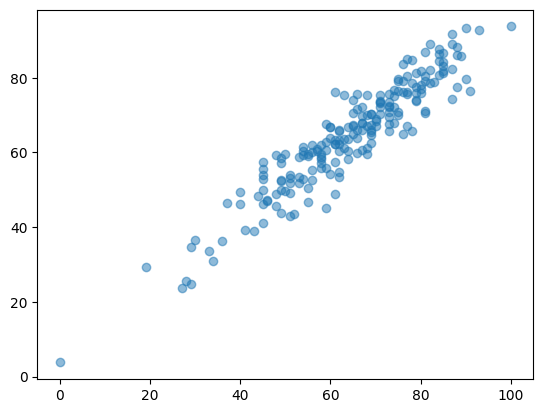

In [47]:
plt.scatter(y_test, y_pred, alpha=0.5)

<Axes: xlabel='math score'>

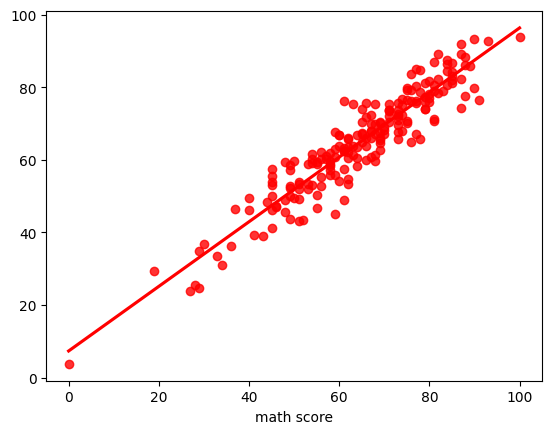

In [48]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')